In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Image Compression: JPEG

In this task, we will explore the effect of JPEG compression. You do not need to write the algorithm for JPEG compression. We will simply use the inbuilt `cv2.imwrite` function and will vary the Q value for JPEG compression. Note that here Q value is the quality.

To save the image at a quality = 50, use `cv2.imwrite('filename.jpeg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 50])`. 

Use the provided function `get_file_size()` to find the size of the file in KB. for eg: `get_file_size('filename.jpeg')`

### Your task
1. Upsample the original image by 2 >> downsample by 2 >> save at Q = 80
2. Downsample the original image by 2 >> upsample by 2 >> save at Q = 80
3. Apply an average filter of 5 x 5 on original image >> save at Q = 80

After you do the above three operations on the original image. Compare the size of the saved image. Is there’s any change, Yes/ No? If Yes, try to explain why? Write your explanation in your observations.

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-ws4i90yk
  Created wheel for ee604-plugins: filename=ee604_plugins-0.4.2-cp36-none-any.whl size=2457 sha256=bf2d174ee258512ddd84fd9345fc78e386c6502166fd1c2a1bbae2b99c0732e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-1rnqc4jo/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-ws4i90yk


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage

def get_file_size(file_dir):
    b = os.path.getsize(file_dir)
    return round(b/1000, 1)

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=4, task_no=1) # download data for this assignment

Download Complete!


In [4]:
def jpeg_playground(img):
    '''
    Inside this function do the task as described above, i.e.
      1. Upsample the original image by 2 >> downsample by 2 >> save at Q = 80
      2. Downsample the original image by 2 >> upsample by 2 >> save at Q = 80
      3. Apply an average filter of 5 x 5 on original image >> save at Q = 80
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + Orig_img - Original image after compressing at Q = 80
    + Orig_size - Size of the saved image of Orig_img at Q = 80
    
    + UD_img - Image obtained after upsampling and downsampling
    + UD_size - Size of the saved image of UD_img at Q = 80
    
    + DU_img - Image obtained after downsampling and upsampling
    + DU_size - Size of the saved image of DU_img at Q = 80
    
    + Smooth_img - Image obtained after smoothing using average filter
    + Smooth_size - Size of the saved image of Smooth_img at Q = 80
    
    Allowed external package:
    + Any relevant module in openCV
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    img = img.copy()

    cv2.imwrite('Orig_img.jpeg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    Orig_img = cv2.imread('Orig_img.jpeg')
    Orig_size = get_file_size('Orig_img.jpeg')

    D_img = cv2.resize(img,(0,0),fx=0.5,fy=0.5)
    U_img = cv2.resize(img,(0,0),fx=2,fy=2)

    UD_img_uc = cv2.resize(U_img,(0,0),fx=0.5,fy=0.5)
    DU_img_uc = cv2.resize(D_img,(0,0),fx=2,fy=2)

    cv2.imwrite('UD_img.jpeg', UD_img_uc, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    UD_img = cv2.imread('UD_img.jpeg').astype('uint8')
    UD_size = get_file_size('UD_img.jpeg')

    cv2.imwrite('DU_img.jpeg', DU_img_uc, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    DU_img = cv2.imread('DU_img.jpeg').astype('uint8')
    DU_size = get_file_size('DU_img.jpeg')
    
    Smooth_img_uc = cv2.blur(img,(5,5))
    
    cv2.imwrite('Smooth_img.jpeg', Smooth_img_uc, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    Smooth_img = cv2.imread('Smooth_img.jpeg').astype('uint8')
    Smooth_size = get_file_size('Smooth_img.jpeg')
    
    #############################
    # End your code here ########
    #############################   
    
    return Orig_img, Orig_size, UD_img, UD_size, DU_img, DU_size, Smooth_img, Smooth_size

### Observations

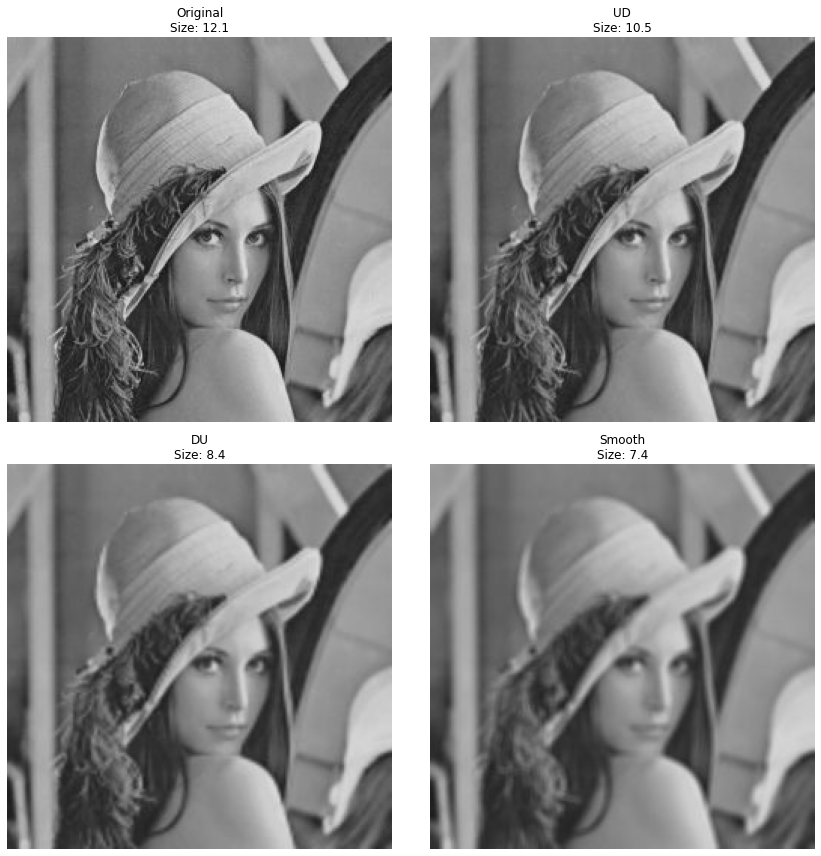

In [5]:
# Do not change codes inside this cell
# Add your observations in next cell
# Your observation should compare the images vs the size of the jpeg compression on different operations

img = cv2.imread("data/lena_gray.jpg", 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)

Orig_img, Orig_size, UD_img, UD_size, DU_img, DU_size, Smooth_img, Smooth_size = jpeg_playground(img)

fig = plt.figure(figsize=(12, 12))
plot_frame(2, 2, 0, Orig_img, "Original\nSize: " + str(Orig_size))
plot_frame(2, 2, 1, UD_img, "UD\nSize: " + str(UD_size))
plot_frame(2, 2, 2, DU_img, "DU\nSize: " + str(DU_size))
plot_frame(2, 2, 3, Smooth_img, "Smooth\nSize: " + str(Smooth_size))
fig.tight_layout()
plt.show()

In [6]:
your_observation = """
For UD image, the size actually depends on the interpolation technique used. But we can assume that since in upsampling no information is lost, 
we can extract whole image back through proper down sampling. So, file size should not change that much, even if it goes slightly lower.

For DU image, there will be a definite loss of information with down sampling first, which can never be recovered with upsampling.

Whereas as expected, smoothning a image loses most of the information. and thus the highest compression relatively.
"""

print(your_observation)


For UD image, the size actually depends on the interpolation technique used. But we can assume that since in upsampling no information is lost, 
we can extract whole image back through proper down sampling. So, file size should not change that much, even if it goes slightly lower.

For DU image, there will be a definite loss of information with down sampling first, which can never be recovered with upsampling.

Whereas as expected, smoothning a image loses most of the information. and thus the highest compression relatively.

